<a href="https://colab.research.google.com/github/thual/HSL-obstacle/blob/main/Courbes_de_remous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 08/01/2023. Licence CC BY-SA*

# Courbes de remous pour une pente constant 


La profondeur $h={\cal H}(x)$ d'un écoulement stationnaire à surface libre dans un canal de pente constante $I$ obéit à l'équation 
$$ {dh\over dx} = {\cal F}(h) = I \;{1 - (h_n/h)^{10/3} \over {1 - (h_c/h)^3}}\;,$$
où la hauteur critique $h_c$ et la hauteur normale $h_n$ sont définies par les relations
$$
h_c =\left({q^2\over g}\right)^{1/3}
\quad \hbox{et} \quad
h_n =\left({q^2\over I \, K^2}\right)^{3/10}\;, 
$$
avec $K$ est le nombre de Strickler,  $g=9,81$ m.s $^{-2}$ et $q$ le débit linéique.


On souhaite calculer les courbes de remous $h(x)$ pour les cas des pentes faibles ($h_n> h_c$), critique ($h_n=h_c$) et fortes ($h_n < h_c$). La pente critique $I_c$ est donc définie par la relation 
$$
I_c = \left( {g\, h_c^{-1/3} \over K^2} \right) =  \left( {g\, h_n^{-1/3} \over K^2} \right)\;.$$

La nomenclature de ces courbes de remous est la suivante :

*   Pente faible ($h_n> h_c$) : $M_1$ pour $h\in]h_n,\infty[$, $M_2$ pour $h\in]h_c,h_n[$ et $M_3$ pour $h\in]0,h_c[$.
*   Pente critique ($h_n= h_c$) : $C_1$ pour $h\in]h_c=h_n,\infty[$,  et $C_3$ pour $h\in]0,h_c=h_n[$.
*   Pente forte ($h_n< h_c$) : $S_1$ pour $h\in]h_c,\infty[$, $S_2$ pour $h\in]h_n,h_c[$ et $S_3$ pour $h\in]0,h_n[$.


**Références :**
* O. Thual, [Hydrodynamique à surface libre](https://www.olivier-thual.fr/xsee/index.htm),  Les Éditions de l'École Polytechnique, 2010.

*  O. Thual, [Hydraulique à surface libre](https://www.olivier-thual.fr/200122), Éd. Ress. Pédago. Ouv. INP 0122 (2020) 40h


**TP numérique :**

Ce TP numérique consiste à faire varier des paramètres à partir du code python de démonstration proposé. Ce Jupyter notebook pourra être recopié pour en créer un nouveau avec ces modifications. 


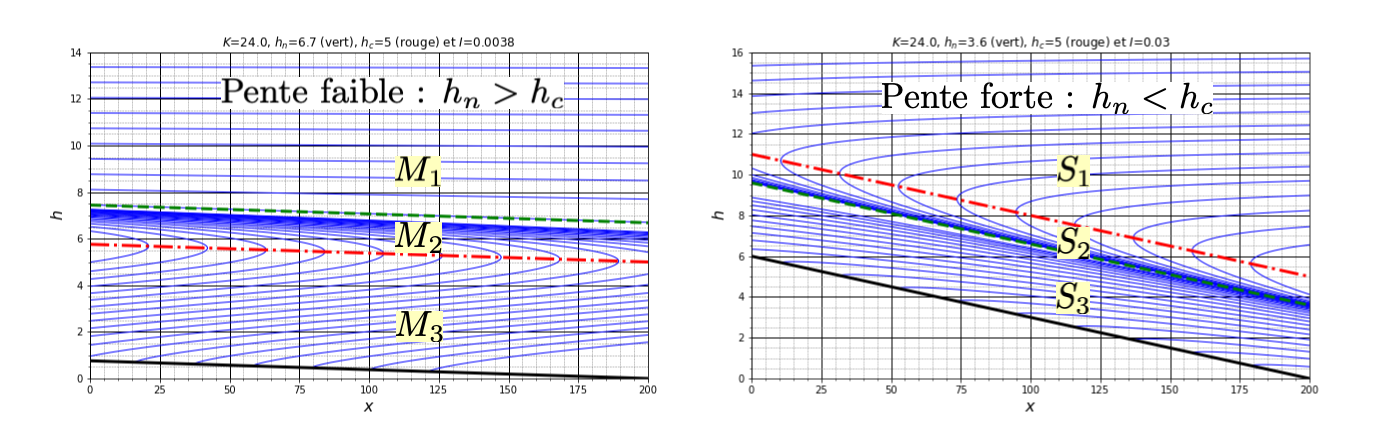

# Question 1

**Question 1.** On fixe $h_c=5$ cm et $I_c=0.001$. Calculez numériquement la valeur de $K$ associée. 

**Réponse 1.**

*Rédigez la réponse ici et insérez le code python de ce calcul ci-dessous !*

# Sous-programmes

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et les sous-programmes !    

*  Colab : ⌘/Ctrl+F9 pour tout exécuter.
*  MyBinder : -> Run -> "Run all cells"

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
import warnings


def zfi(x,le=2):
    # Pour imprimer des nombres
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    plt.grid(b=True, which='major', color='black', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='grey', linestyle='--',linewidth='0.5')

def calF(h,x,I,hn,hc):
    Num=I*(1-(hn/h)**(10/3))
    Den=1-(hc/h)**3
    calF=Num/Den
    return calF

def courbe(h0,x,I,hn,hc):
    # Backwater curves
    sol=odeint(calF,h0,x,args=(I,hn,hc))
    return sol  

def multic(hmax,L,nx,I,hn,hc):    
    # Slope
    forte=False; faible=False; critique=False;
    hnr=np.round(hn,1); Ir=np.round(I,5);
    if hnr>hc: 
        faible=True; print("///=======/// Pente faible, hn=",np.round(hn,2),"hc=",hc,"I=",Ir)
    if hnr==hc: 
        critique=True; print("///=======/// Pente critique, hn=",hn,"hc=",hc,"I=",Ir)
    if hnr<hc: 
        forte=True; print("///=======/// Pente forte, hn=",hn,"hc=",hc,"I=",Ir)
    
    if faible:
        # Courbes M1
        eps=.01; x0=0; xe=L; 
        for h0 in np.linspace(hn+eps,hmax-I*L,10):
            trace(L,nx,x0,xe,h0,I,hn,hc);
       # Courbe M2 et M3
        eps=.01; xe=0; hcp=hc+eps; hcm=hc-eps
        for x0 in np.linspace(0,1.8*L,20):
            trace(L,nx,x0,xe,hcp,I,hn,hc); # M2
            trace(L,nx,x0,xe,hcm,I,hn,hc); # M3
    
    if critique:
       # Courbe M1 et M3
        eps=.01; xe=L; h0=eps; hcp=hc+eps;
        for x0 in np.linspace(-L,L,20):
            trace(L,nx,x0,xe,h0,I,hn,hc); # C1
            trace(L,nx,x0,xe,hcp,I,hn,hc); # C3
    
    if forte:
       # Courbe S3
        eps=.01; xe=L; h0=eps; hcp=hc+eps; hcm=hc-eps
        for x0 in np.linspace(-L,L,20):
            trace(L,nx,x0,xe,h0,I,hn,hc); # S3
            trace(L,nx,x0,xe,hcp,I,hn,hc); # S2
            trace(L,nx,x0,xe,hcm,I,hn,hc); # S1    

def trace(L,nx,x0,xe,h0,I,hn,hc):
    #ax=plt.subplot(1,1,1)
    x=np.linspace(x0,xe,nx);
    Zf=I*(L-x);
    h=courbe(h0,x,I,hn,hc)[:,0]
    ax.plot(x,Zf+h,color='b',linewidth=1)

def Gifanim(anifunc):
    global inter, fram
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    namegif=name+".gif"
    print(" ")   
    print("==================================")
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("   Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("Simulation pour visualiser l'animation")   
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani

def anirem(i):
    # Animation simple
    I=I0+i*dI
    hn=((q/K)**2/I)**.3
    hmax0=Imax*L+2*hc
    hmax=2*max(hc,hn) 
    # Figure 
    ax.clear()
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'$h$',fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(0,hmax0)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='grey', linestyle='--',linewidth='0.5')
    # Title
    It=str(np.round(I,5)); Kt=str(np.round(K,0));
    hnt=str(np.round(hn,1)); hct=str(np.round(hc,1));
    ax.set_title("$K$="+Kt+", $h_n$="+hnt+" (vert), $h_c$="+hct+" (rouge) et $I$="+It)
   
    # Trace du signal
    multic(hmax,L,nx,I,hn,hc)
    
    # Trace pente
    ax.plot([0,L],[hc+I*L,hc],color='r',linestyle='-.',linewidth=3)   
    ax.plot([0,L],[hn+I*L,hn],color='g',linestyle='--',linewidth=3)   
    ax.plot([0,L],[I*L,0],color='k',linestyle='-',linewidth=3) 

    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+"i"+zfi(i);
        fig.savefig(namei)           

   
def anicalF(i):
    # Animation simple
    I=I0+i*dI
    hn=((q/K)**2/I)**.3
    hmax0=Imax*L+2*hc
    Fmax=10; Fmin=-Fmax

    # Figure 
    ax.clear()
    ax.set_xlabel(r'$h$',fontsize=16 )
    ax.set_ylabel(r'${\cal F}/I$',fontsize=16)
    ax.set_xlim(0,hmax0)
    ax.set_ylim(Fmin,Fmax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='grey', linestyle='--',linewidth='0.5')
    # Title
    It=str(np.round(I,5)); Kt=str(np.round(K,0));
    hnt=str(np.round(hn,1)); hct=str(np.round(hc,1));
    ax.set_title("$K$="+Kt+", $h_n$="+hnt+" (vert), $h_c$="+hct+" (rouge) et $I$="+It)
   
    # Trace du signal
    h=np.linspace(0,hmax0,501)
    Nu=(1-(hn/h)**(10/3))
    Den=1-(hc/h)**3
    Ftab=Nu/Den
    ax.plot(h,Ftab,color='b',linestyle='-',linewidth=1)    
    
    # Asymptots
    ax.plot([hc,hc],[Fmin,Fmax],color='r',linestyle='-.',linewidth=3)   
    ax.scatter(hn,0,color='g')   
    ax.plot([0,hmax0],[1,1],color='k',linestyle='dotted',linewidth=2)    
    ax.plot([0,hmax0],[0,0],color='k',linestyle='-',linewidth=2)        # Sauver toutes les figures
    if FlagSavext: 
        namei=name+"i"+zfi(i);
        fig.savefig(namei)      

# Une seule figure

Les paramètres suivants peuvent être changés :

*  `I` : Pente
*  `K` : Strickler
*  `L` : Longueur du domaine

# Question 2

**Question 2.** Changez les valeurs de $I$, $K$ et $L$ et insérez la figure obtenue ci-dessous !

**Réponse 2.**

*Insérez la figure ci-dessous !*

///=======/// Pente forte, hn= 0.8075914334691691 hc= 1 I= 0.002


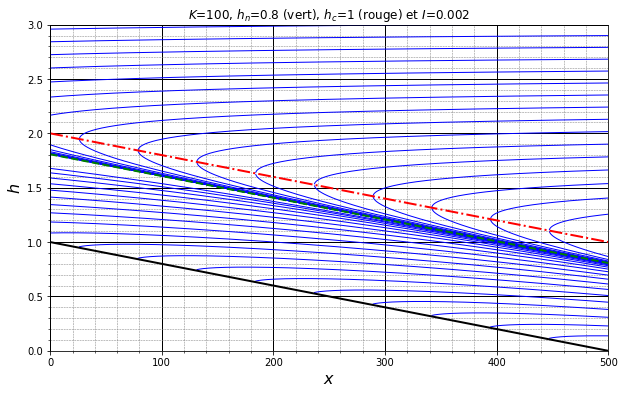

In [96]:
def single():
    # Parameters to change
    I=0.002 # Slope
    K=100; # Normal height
    L=500 # Length of the domain
    
    # Parameters to maintain 
    nx=1000 # Number or grid points for plots
    g=9.81; # Gravity
    hc=1; # Critical height
    
    # Derived parameters
    q=(g*hc**3)**.5;
    hn=((q/K)**2/I)**.3
    hmax=I*L+2*max(hc,hn) 
       
    # Plots
    #inifig(xlab='$x$',ylab='$Z$') 
    #ax=plt.subplot(1,1,1)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'$h$',fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(0,hmax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='grey', linestyle='--',linewidth='0.5')
    It=str(np.round(I,4)); Kt=str(np.round(K,0));
    hnt=str(np.round(hn,1)); hct=str(np.round(hc,1));
    plt.title("$K$="+Kt+", $h_n$="+hnt+" (vert), $h_c$="+hct+" (rouge) et $I$="+It)
    plt.xlim(0,L)
    plt.ylim(0,hmax)
    
    
    # Multic curves
    multic(hmax,L,nx,I,hn,hc)
    # Slopes
    plt.plot([0,L],[hc+I*L,hc],color='r',linestyle='-.',linewidth=2)   
    plt.plot([0,L],[hn+I*L,hn],color='g',linestyle='--',linewidth=2)   
    plt.plot([0,L],[I*L,0],color='k',linestyle='-',linewidth=2)  
    
    
    # End figure
    plt.savefig('lremousI'+str(I)+'K'+str(K)+'.pdf')
    plt.show(); plt.close()

#####
# Programme principal
fig=plt.figure(1,figsize=(10,6))
ax=plt.subplot(1,1,1)
single()

# Animations

Il s'agit ici de tracer la fonction ${\cal F}(h)/I$ et l'ensemble des courbes de remous pour $I$ variable, $I_c$ et $h_c$ étant fixé.

Paramètres pouvant être changés 

*   `Ic` : Pente critique
*   `L` : Longueur du domaine
*   `NI` : Nombre d'images
*   `Ic` : Pente critiaue
*   `I0` et `Imax` : Intervalle de variation de $I$
*   `FlagSavext` : =1 pour sauvegarder un fichier gif animé



In [97]:
# Main 
F=False; T=True
warnings.filterwarnings('ignore')

# Parameters to change
Ic=.001; # Pente critique
L=2000 # Length of the domain
NI=7; # Number of images
I0=.25*Ic; Imax=1.75*Ic; dI=(Imax-I0)/(NI-1) # Variation of I
FlagSavext=T # To save the gif


# Parameters to maintain 
nx=1000 # Number or grid points for plots
g=9.81; # Gravity
hc=5; # Critical height
inter=500 # interval between frames in ms
 

# Derived parameters
fram=range(0,NI) # Frames pour FuncAnimation
q=(g*hc**3)**.5; # Debit lineique
K=np.sqrt(g*hc**(-1/3)/Ic); print("K=",K) # Strickler
   
# Figure preparation 
fig=plt.figure(1,figsize=(10,6))
ax=plt.subplot(1,1,1)

name="CalFK"+str(int(K))
aniF=Gifanim(anicalF)

name="RemousK"+str(int(K))
aniR=Gifanim(anirem)


K= 75.74247686980961
 
Simulation pour créer un gif animé
   Gif animé créé : CalFK75.gif
Simulation pour visualiser l'animation
 
Simulation pour créer un gif animé
///=======/// Pente faible, hn= 7.58 hc= 5 I= 0.00025
///=======/// Pente faible, hn= 7.58 hc= 5 I= 0.00025
///=======/// Pente faible, hn= 6.16 hc= 5 I= 0.0005
///=======/// Pente faible, hn= 5.45 hc= 5 I= 0.00075
///=======/// Pente critique, hn= 5.0 hc= 5 I= 0.001
///=======/// Pente forte, hn= 4.676242239113106 hc= 5 I= 0.00125
///=======/// Pente forte, hn= 4.4273374664777805 hc= 5 I= 0.0015
///=======/// Pente forte, hn= 4.227256394215354 hc= 5 I= 0.00175
   Gif animé créé : RemousK75.gif
Simulation pour visualiser l'animation


# Animation de la fonction ${\cal F}(h)/I$

Animation du tracé de ${\cal F}(h)/I$ pour  $I$ variable

In [100]:
aniF

# Animation des courbes de remous $h(x)$

Animation du tracé des courbes de remous $h(x)$ pour  $I$ variable

In [101]:
aniR

# Question 3

**Question 3.** Changez la valeurs de $I_c$, $L$, `I0` et  `Imax` insérez la figure obtenue ci-dessous ! Choisissez  `I0`,  `Imax` et  `NI` de sorte qu'une des figures corresponde au cas critique.  

**Réponse 3.**

*Insérez la figure ci-dessous !*